# 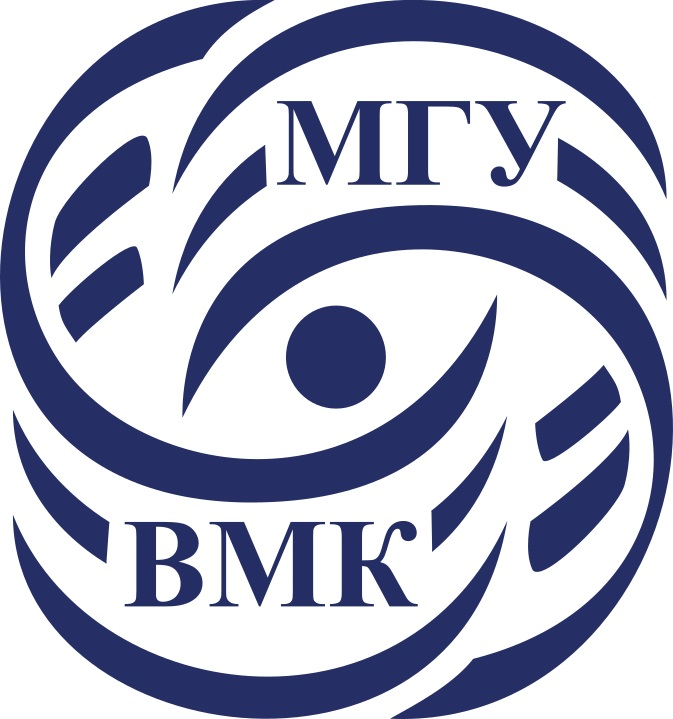

# Машинное обучение. ВМК МГУ

## Практическое задание 10: Частичное Обучение. Методы снижения размерности.

### Важно! О формате сдачи

* Практически все выделенные задания из ноутбука оцениваются по системе <font color='red'>кросс-рецензирования.</font> Задания, в которых надо реализовать свой код и послать в систему, выделены здесь и в PDF отдельно.
* В этом задании также есть задания по типу <font color='red'>unit-test.</font>
* При решении ноутбука <font color='red'>используйте данный шаблон.</font> Не нужно удалять текстовые ячейки с разметкой частей ноутбука и формулировками заданий. Добавлять свои ячейки, при необходимости, конечно, можно.
* Везде, где в формулировке задания есть <font color='red'>какой-либо вопрос (или просьба вывода),</font> необходимо прописать ответ в ячейку (код или Markdown).
* Наличие <font color='red'>кода решения обязательно.</font> Письменные ответы на вопросы без сопутствующего кода оцениваются в 0 баллов.
* Если в ячейке написана фраза <font color='red'>"Вывод"/"Ответ на вопрос" и.т.д.,</font> то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано <font color='red'>"Your code here" и пр. </font>, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой "Вывод", и ячейка с фразой "Your code here", то в ответе ожидается и код, и текст

**А также..**

Если в ячейке написана фраза `Ваш ответ здесь: (ｏ・_・)ノ”(ノ_<、)`, то ожидается ответ в виде текста (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если в ячейке написано `# Ваш код здесь:＼(º □ º l|l)/`, то ожидается ответ в виде кода (можете добавить ячейки с кодом, если считаете это необходимым, но это необязательно). Если есть и ячейка с фразой `Ваш ответ здесь: (ｏ・_・)ノ”(ノ_<、)`, и ячейка с фразой `# Ваш код здесь:＼(º □ º l|l)/`, то в ответе ожидается и код, и текст)

**В этом задании вы..:**

* Познакомитесь с одним способом визуализации процесса обучения
* Сравните между собой результаты разных способов кластеризации
* Посмотрите и реализуете несколько метрик качества кластеризации
* Попробуете разные методы снижения размерности

<font color=orange><h3>*Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука: 60 минут*</font></h3>


----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

Если вы работаете с ноутбуком <font color='red'>локально</font>, то перед началом выполнения переведите ноутбук в `Доверенный режим` (`Trusted`) для корректного отображения изображений:

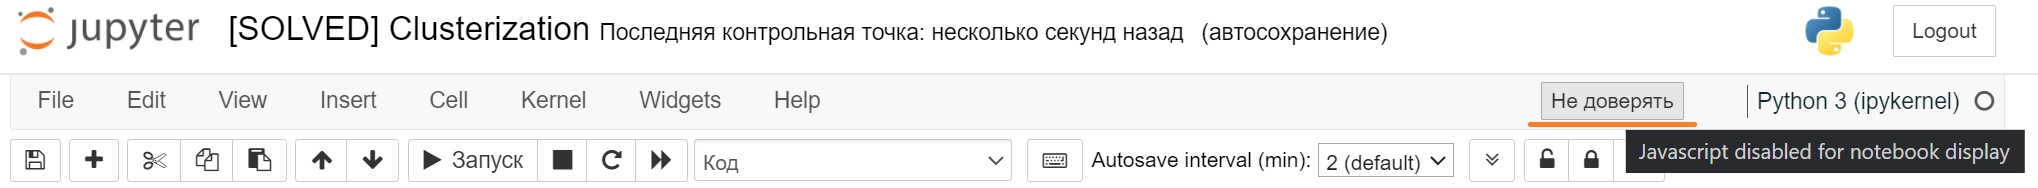

In [ ]:
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

# 0. Введение.

## 0.1 О задании

В данной работе вам будет предложено применить кластеризацию и снижение размерности в задачах **Частичного Обучения** (Semi-Supervised learning).

## 0.2 Необходимые библиотеки

### Установка в Google Colab
Если вы используете Google Colab, то вам достаточно установить библиотеки с помощью ячейки ниже.

После установки нужных версий нажмите на кнопку `Restart runtime`, которая появится в следующей ячейке после завершения ее выполнения.

После перезапуска (`Restart runtime`) устанавливать библиотеки еще раз не нужно, достаточно проверить, что установилась их новая версия.

**Важно!**
Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='red'>**Внимание!**</font> В этом задании мы будем использовать полное виртуальное окружение, так как понадобятся библиотеки `torch` и `tensorflow`

**Обратите внимание, что установка `torch` и `tensorflow` через `pip` может сломать ваше окружение, особенно если вы используете GPU. Выполняйте их установку в соответствии с Вашей конфигурацией системы или в отдельном виртуальном окружении**

In [ ]:
! pip install --upgrade gdown
! gdown 13tID3G5Bd5rKtmUd_s6SvSI_bG3zgmAS
! pip install -r ./requirements_2023_24.txt

Downloading...
From: https://drive.google.com/uc?id=13tID3G5Bd5rKtmUd_s6SvSI_bG3zgmAS
To: /content/requirements_2023_24.txt
100% 443/443 [00:00<00:00, 1.64MB/s]


Здесь перечислены основные функции и библиотеки, которые могут понадобиться Вам в процессе выполнения задания. Подключение других библиотек возможно, но нежелательно. **Работа каких-либо других библиотек не гарантируется.**

In [ ]:
import os

# Подавим уведомления о проблемах c tensorflow
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

import warnings

import numpy as np

import tqdm.auto as tqdm

import scipy.spatial.distance

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

from torchvision.datasets import MNIST

import sklearn

from sklearn.cluster import KMeans

from sklearn.linear_model import LogisticRegression
from sklearn.semi_supervised import SelfTrainingClassifier

# Библиотека umap-learn, а не umap
from umap import UMAP

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

# Подавим уведомления о проблемах со сходимостью в sklearn
simplefilter("ignore", category=ConvergenceWarning)

/usr/local/lib/python3.10/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

**<font color='red'>Обратите внимание</font>, что динамическое содержимое может некорректно сохраняться в jupyter notebook. Используйте его только для локальной визуализации. Все графики, необходимые для сдачи задания должны быть статическими. Переход в статический режим происходит с помощью магической команды `%matplotlib inline`.**

**<font color='red'>Обязательно убедитесь, что все графики корректно сохранились корректно в ноутбуке перед сдачей в систему.</font>** Для этого достаточно открыть загруженный в систему файл и, просмотрев его, убедиться, что все сохранилось корректно

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

## 0.3 Ещё несколько важных замечаний

При выполнении задания <font color='red'>запрещено</font>:
1. Менять те seed, которые явно указаны в коде
2. Менять прототипы функций, классов, методов классов
3. Менять константы, используемые для генерации выборок

При оформлении задания обратите внимание на форматирование кода и на оформление графиков:

* Весь код должен быть оформлен в строгом соответствии с [PEP8](https://pep8.org/) (для юнит-тестов обязательно, для ноутбука очень желательно)

Графики должны быть с одной стороны понятными и информативными, а с другой стороны *красивыми*. Вот несколько пунктов, которые помогут удовлетворить этим требования:
1. Все графики должны быть отрисованы в **векторном формате**. Обратите внимание, что смена режима графиков с динамического на статический и обратно может приводить к сбросу параметров отрисовки графиков. Переход в векторный режим можно выполнить с помощью команды `matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')`. Если изображения в векторном формате приводят к слишком большому размеру Jupyter Notebook можете использовать растровые изображения с **высоким dpi**. Напирмер, можно установить глобальный dpi в matplotlib: `matplotlib.rcParams['figure.dpi'] = 300`
2. На всех графиках без исключения должна быть нарисована сетка
3. Все графики и группы графиков должны иметь заголовок (`title`)
4. При необходимости оси должны быть подписаны
5. Если на графике отображено несколько сущностей (линии/точки/bar разных цветов, формы и так далее), то необходима исчерпывающая легенда
6. Все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном и так далее)
7. Масштаб по каждой оси на графике должен быть выбран правильно. Используйте масштабы `log`, `symlog` по необходимости
8. Если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах)
9. Частота отметок по каждой оси должна быть тщательно подобрана, по необходимости задавайте `[xy]ticks`, `[xy]ticklabels` вручную. Подписи тиков на осях не должны сливаться как на одной оси, так и между ними
10. Помните, что matplotlib умеет выполнять [рендеринг Latex](https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html). Используйте эту возможность для написания формул в заголовках, легенде и в подписях осей
11. Используйте *красивую* цветовую палитру с хорошо различимыми цветами. Примеры цветовых палитр можно посмотреть [здесь](https://matplotlib.org/stable/gallery/color/colormap_reference.html). При наличи особенностей восприятия цвета можно использовать специальные палитры:
```python
plt.style.use('seaborn-colorblind')
# Или
plt.style.use('tableau-colorblind10')
# Затем, при отрисовке графиков не используйте параметр cmap
```
12. Графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

# <font color='orange'>1. Частичное обучение.  [кросспроверка 30 баллов,  unittests 20 баллов]</font>

В этой части мы рассмотрим применение алгоритмов снижения размерности и кластеризации в контексте задач классификации в постановке Semi-Supervised learning.

Рассмотрим задачу классификации изображений из датасета MNIST. Предположим, что известна только небольшая часть разметки по которой мы хотим обучить классификатор. В отличии от классических задач обучения с учителем здесь мы можем использовать большой объём неразмеченных объектов.

Будем далее считать, что неразмеченные объекты имеют метку $-1$.

Существует много вариантов решения данной задачи. Предлагается рассмотреть следующие из них:
1. Обучение модели, например, логистической регрессии на размеченной части
2. Методы SelfTraining, в частости `SelfTrainingClassifier` с логистической регрессией в качестве базовой модели
3. Использование кластеризации для определения групп похожих объектов и размеченной подвыборки для определения меток кластеров

Каждый из данных вариантов можно обучать на разных признаковых пространствах. Предлагается проверить, как методы снижения размерности будут влиять на качество итогового алгоритма. Нужно учесть, что не все алгоритмы снижения размерности допускают преобразование новых объектов в низкоразмерное пространство, поэтому предлагается сравнить `UMAP` с исходным признаковым пространством.

#### <font color='orange'>**Задание 1.1 [unittests, 20 баллов]**</font>

Реализуйте третью из предложенных моделей. Подробная спецификация и описание входных данных к тестам указаны в **описании задания**.

**Замечание:** В данном пункте разрешено использовать `sklearn.cluster.KMeans`

In [ ]:
from scipy.stats import mode

class KMeansClassifier(sklearn.base.BaseEstimator):
    def __init__(self, n_clusters):
        '''
        :param int n_clusters: Число кластеров которых нужно выделить в обучающей выборке с помощью алгоритма кластеризации
        '''
        super().__init__()
        self.n_clusters = n_clusters

        # Ваш код здесь:＼(º □ º l|l)/

    def fit(self, data, labels):
        '''
            Функция обучает кластеризатор KMeans с заданным числом кластеров, а затем с помощью
        self._best_fit_classification восстанавливает разметку объектов

        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов обучающей выборки
        :param np.ndarray labels: Непустой одномерный массив. Разметка обучающей выборки. Неразмеченные объекты имеют метку -1.
            Размеченные объекты могут иметь произвольную неотрицательную метку. Существует хотя бы один размеченный объект
        :return KMeansClassifier
        '''
        self.kmeans = KMeans(n_clusters=self.n_clusters).fit(data)
        self.classification, _ = self._best_fit_classification(self.kmeans.labels_, labels)
        return self

    def predict(self, data):
        '''
        Функция выполняет предсказание меток класса для объектов, поданных на вход. Предсказание происходит в два этапа
            1. Определение меток кластеров для новых объектов
            2. Преобразование меток кластеров в метки классов с помощью выученного преобразования

        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов
        :return np.ndarray: Предсказанные метки класса
        '''
        predictions = self.classification[self.kmeans.predict(data)]

        return predictions

    def _best_fit_classification(self, cluster_labels, true_labels):
        '''
        :param np.ndarray cluster_labels: Непустой одномерный массив. Предсказанные метки кластеров.
            Содержит элементы в диапазоне [0, ..., n_clusters - 1]
        :param np.ndarray true_labels: Непустой одномерный массив. Частичная разметка выборки.
            Неразмеченные объекты имеют метку -1. Размеченные объекты могут иметь произвольную неотрицательную метку.
            Существует хотя бы один размеченный объект
        :return
            np.ndarray mapping: Соответствие между номерами кластеров и номерами классов в выборке,
                то есть mapping[idx] -- номер класса для кластера idx
            np.ndarray predicted_labels: Предсказанные в соответствии с mapping метки объектов

            Соответствие между номером кластера и меткой класса определяется как номер класса с максимальным числом объектов
        внутри этого кластера.
            * Если есть несколько классов с числом объектов, равным максимальному, то выбирается метка с наименьшим номером.
            * Если кластер не содержит размеченных объектов, то выбирается номер класса с максимальным числом элементов в выборке.
            * Если же и таких классов несколько, то также выбирается класс с наименьшим номером
        '''
        most_common = mode(true_labels[true_labels != -1])[0]
        mapping = np.empty(self.n_clusters)
        for i in np.arange(self.n_clusters):
            h = true_labels[cluster_labels == i]
            h = h[h != -1]
            mapping[i] = np.min(mode(h)[0]) if h.shape[0] else most_common
        predicted_labels = mapping[cluster_labels]
        return mapping, predicted_labels

Проверьте `KMeansClassifier._best_fit_classification` на простейших тестах:

In [ ]:
def all_equal(list_left, list_right):
    assert np.all([np.all(left == right) for left, right in zip(list_left, list_right)])

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([2, 2, 2, 1, 1, 1, 0, 0, 0]),
        np.array([5, 5, 6, 8, 7, 6, 6, 7, 7]),
    ),
    (np.array([7, 6, 5, 6, 6, 6, 6, 6, 6, 6]), np.array([5, 5, 5, 6, 6, 6, 7, 7, 7]))
)

all_equal(
    KMeansClassifier(10)._best_fit_classification(
        np.array([ 4,  4,  4, 1, 1, 1, 2, 2, 2, 3, 3, 3,  0, 0,  0, 0,  0]),
        np.array([-1, -1, -1, 5, 5, 6, 8, 7, 6, 6, 7, 7, -1, 8, -1, 3, -1]),
    ),
    (np.array([3, 5, 6, 7, 6, 6, 6, 6, 6, 6]), np.array([6, 6, 6, 5, 5, 5, 6, 6, 6, 7, 7, 7, 3, 3, 3, 3, 3]))
)

Теперь создадим модель которая будет объединять все вышеописанные способы решения задачи Semi-Supervised learning.

#### <font color='orange'>**Задание 1.2 [код]**</font>

Реализуйте модель, которая в зависимости от параметра `data_processing` будет выполнять то или иное преобразование признакового пространства. Параметр `model` должен задавать одну из трёх описанных выше моделей поверх преобразованных данных. Вспомогательные аргументы нужно передавать через словари `reducer_kwargs`, `model_kwargs` (например, размерность пространства для методов снижения размерности, коэффициент регуляризации логистической регрессии, число кластеров KMeans и так далее).

*Замечание:* Большую часть времени работы модели (как обучения, как и предсказания) будет занимать преобразование признаков в низкоразмерное пространство с помощью UMAP. Если несколько способов, как ускорить данный процесс:
1. Параметр `n_neighbors` у UMAP значительно влияет на скорость работы. Можно установить его меньше, чем по умолчанию (не желательно ставить его меньше $5-7$). Попробуйте подобрать этот параметр в зависимости от качества визуализации в задании **1.3**
2. Так как UMAP метрический алгоритм, он требует большого числа вычислений попарных расстояний между точками. При выполнении перебора гиперпараметров в заданиях ниже можно значительно сэкономить, предподсчитав попарное расстояние между объектами для обучения и расстояние между объектам для предсказаний и объектами обучающей выборки. Используйте для работы в таком режиме `metric='precomputed'`. В таком режиме UMAP выдаёт ненужные warnings. Подавите их с помощью соответствующего контекстного менеджера:
```python
with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # Вызовы UMAP. __init__ / fit / fit_transform / transform
```
Не забудьте про масштабирование признаков

In [ ]:
class MetaSemiSupervisedModel(sklearn.base.BaseEstimator):
    def __init__(self, data_processing=None, model='LogisticRegression', reducer_kwargs=None, model_kwargs=None):
        '''
        :param str data_processing:
            Если data_processing == 'UMAP', то входные данные необходимо преобразовать с помощью данного алгоритма с
                числом компонент reducer_kwargs['n_components'].
            Опционально, используйте reducer_kwargs['metric'] для ускорения алгоритма с помощью предподсчитанной
                матрицы расстояний
            Иначе, не преобразовывать входные данные
        :param str model:
            Если model == 'LogisticRegression', то использовать логистическую регрессию на размеченных данных
                и коэффициентом регуляризации model_kwargs['C']
            Если model == 'SelfTrainingClassifier', то использовать SelfTrainingClassifier с базовой моделью LogisticRegression
                и коэффициентом регуляризации model_kwargs['C']
            Если model == 'KMeansClassifier', то использовать KMeansClassifier с числом кластеров model_kwargs['n_clusters']
        :param dict reducer_kwargs:
        :param dict model_kwargs:
        '''
        super().__init__()

        self.model_name = model
        self.data_processing = None
        self.metric = None
        self.scaler = StandardScaler()

        if model == 'LogisticRegression':
            self.model = LogisticRegression(C=model_kwargs['C'])
        elif model == 'SelfTrainingClassifier':
            self.model = SelfTrainingClassifier(base_estimator=LogisticRegression(C=model_kwargs['C']))
        elif model == 'KMeansClassifier':
            self.model = KMeansClassifier(n_clusters=model_kwargs['n_clusters'])
        else:
            raise "Wrong model"

        if data_processing == "UMAP":
            self.metric = reducer_kwargs.get('metric', 'euclidean')
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                self.data_processing = UMAP(n_components=reducer_kwargs['n_components'], metric=self.metric, n_neighbors=8, random_state=42)

    def fit(self, data, labels):
        '''
        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов обучающей выборки.
            Если reducer_kwargs['metric'] == 'precomputed', тогда @data квадратная матрица попарных расстояний между объектами
        :param np.ndarray labels: Непустой одномерный массив. Разметка обучающей выборки. Неразмеченные объекты имеют метку -1.
            Размеченные объекты могут иметь произвольную неотрицательную метку. Существует хотя бы один размеченный объект
        :return MetaSemiSupervisedModel
        '''
        processed_data = data
        if self.metric != 'precomputed':     # не нормализуем если это матрица попарных расстояний
            self.scaler.fit(processed_data)
            processed_data = self.scaler.transform(processed_data)
        if self.data_processing is not None:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                self.data_processing.fit(processed_data)
                processed_data = self.data_processing.transform(processed_data)
        if self.model_name == "LogisticRegression":
            processed_data = processed_data[labels != -1]
            labels = labels[labels != -1]

        self.model.fit(processed_data, labels)

        return self

    def predict(self, data):
        '''
        Функция выполняет предсказание меток класса для объектов, поданных на вход
        :param np.ndarray data: Непустой двумерный массив векторов-признаков объектов.
            Если reducer_kwargs['metric'] == 'precomputed', тогда @data прямоугольная матрица расстояний между
            каждым объектом для которого делается предсказание и каждым объектом обучающей выборки.
        :return np.ndarray: Предсказанные метки класса
        '''
        processed_data = data
        if self.metric != 'precomputed':
            processed_data = self.scaler.transform(processed_data)
        if self.data_processing is not None:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                processed_data = self.data_processing.transform(processed_data)

        predictions = self.model.predict(processed_data)

        return predictions

Загрузим датасет MNIST. Для ускорения перебора гиперпараметров, можете уменьшить число объектов в выборке. Не делайте это число менее $4000$.

In [ ]:
mnist_n_objects = 4000

In [ ]:
mnist_test_dataset = MNIST('./mnist', train=False, download=True)
mnist_train_dataset = MNIST('./mnist', train=True, download=False)

mnist_labels_test = np.array(mnist_test_dataset.targets)
mnist_labels_train = np.array(mnist_train_dataset.targets)

mnist_images_test = mnist_test_dataset.data.numpy()
mnist_images_train = mnist_train_dataset.data.numpy()

mnist_images_test, _, mnist_labels_test, _ = train_test_split(
    mnist_images_test, mnist_labels_test,
    train_size=mnist_n_objects, stratify=mnist_labels_test, random_state=6886
)
mnist_images_train, _, mnist_labels_train, _ = train_test_split(
    mnist_images_train, mnist_labels_train,
    train_size=mnist_n_objects, stratify=mnist_labels_train, random_state=6886
)

mnist_data_test = (mnist_images_test.astype(np.float32) / 255.0).reshape([mnist_images_test.shape[0], -1])
mnist_data_train = (mnist_images_train.astype(np.float32) / 255.0).reshape([mnist_images_train.shape[0], -1])

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 23682981.72it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1631808.79it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 14018111.53it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3055417.61it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



#### <font color='orange'>**Задание 1.3 [код]**</font>

Примените метод снижения размерности на ваш вкус для новых данных и изобразите результат на графике. Используйте это представление для визуализации в дальнейшем.

*Замечание:* Не забудьте, что масштаб признаков существенно влияет на работу алгоритма снижения размерности.

*Замечание:* Для отрисовки низкоразмерных данных можно использовать функцию `plot_interactive`. Данная функция может работать и в интерактивном режиме, которым можно воспользоваться, если ваша среда выполнения его поддерживает. Не забудьте переключиться в статический режим после отрисовки динамического контента с помощью магической команды `%matplotlib inline`.

In [ ]:
def plot_interactive(lowd_data, images, labels, names, n_dots=1000, image_scale=1.0):
    with matplotlib.rc_context(rc={
        'font.size': image_scale * matplotlib.rcParams['font.size'],
        'xtick.major.size': image_scale * matplotlib.rcParams['xtick.major.size'],
        'xtick.minor.size': image_scale * matplotlib.rcParams['xtick.minor.size'],
        'ytick.major.size': image_scale * matplotlib.rcParams['ytick.major.size'],
        'ytick.minor.size': image_scale * matplotlib.rcParams['ytick.minor.size'],

        'axes.linewidth': image_scale * matplotlib.rcParams['axes.linewidth'],
        'grid.linewidth': image_scale * matplotlib.rcParams['grid.linewidth'],
        'patch.linewidth': image_scale * matplotlib.rcParams['patch.linewidth'],
        'xtick.major.width': image_scale * matplotlib.rcParams['xtick.major.width'],
        'xtick.minor.width': image_scale * matplotlib.rcParams['xtick.minor.width'],
        'ytick.major.width': image_scale * matplotlib.rcParams['ytick.major.width'],
        'ytick.minor.width': image_scale * matplotlib.rcParams['ytick.minor.width'],

        'lines.markeredgewidth': image_scale * matplotlib.rcParams['lines.markeredgewidth'],
    }):
        fig, ax = plt.subplots(1, 1, figsize=(image_scale * 10, image_scale * 5))
        fig.set_dpi(300)
        ax.grid(True)

        n_clusters = len(np.unique(labels))

        scatter = plt.scatter(
            lowd_data[:n_dots, 0], lowd_data[:n_dots, 1], s=image_scale * 10,
            c=labels[:n_dots], cmap=plt.get_cmap('tab20', n_clusters), edgecolors='none'
        )

        cbar = plt.colorbar(scatter, ax=ax, label='Название кластера')
        cbar.set_ticks(np.min(labels[:n_dots]) + (np.arange(n_clusters) + 0.5) * (n_clusters - 1) / n_clusters)
        cbar.set_ticklabels(names)

        offset_image = OffsetImage(images[0], zoom=image_scale * 2.0)
        ann_bbox = AnnotationBbox(
            offset_image, (0,0), xybox=(image_scale * 50., image_scale * 50.), xycoords='data',
            boxcoords="offset points", pad=0.3, arrowprops=dict(
                arrowstyle='->, head_length={0:.2f}, head_width={1:.2f}'.format(
                    image_scale * 0.4, image_scale * 0.2
                )
            )
        )
        ax.add_artist(ann_bbox)
        ax.set_title('Распределение данных CIFAR10 в проекции на 2 случайные оси')
        ann_bbox.set_visible(False)

        def image_hover(event):
            if scatter.contains(event)[0]:
                ind, *_ = scatter.contains(event)[1]["ind"]
                w, h = fig.get_size_inches() * fig.dpi
                ws = (event.x > w / 2.) * -1 + (event.x <= w / 2.)
                hs = (event.y > h / 2.) * -1 + (event.y <= h / 2.)
                ann_bbox.xybox = (image_scale * 50.0 * ws, image_scale * 50.0 * hs)
                ann_bbox.set_visible(True)
                ann_bbox.xy =(lowd_data[ind, 0], lowd_data[ind, 1])
                offset_image.set_data(images[ind])
            else:
                ann_bbox.set_visible(False)
            fig.canvas.draw_idle()

        fig.canvas.mpl_connect('motion_notify_event', image_hover)

        plt.show()

In [ ]:
%matplotlib ipympl
matplotlib.rcParams['figure.dpi'] = 300

# Для работы в Google Colab нужно выполнить специфичную магию
# Обычно, она не срабатывает с первого раза, поэтому может потребоваться
#   несколько раз выполнить ячейку и несколько раз попробовать нарисовать график
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

plt.style.use("seaborn")

scaler = StandardScaler().fit(mnist_data_train)
reducer = UMAP(n_neighbors=15).fit(scaler.transform(mnist_data_train))

lowd_mnist_data_train = reducer.transform(scaler.transform(mnist_data_train))
lowd_mnist_data_test = reducer.transform(scaler.transform(mnist_data_test))

<ipython-input-13-37e6d76980a6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


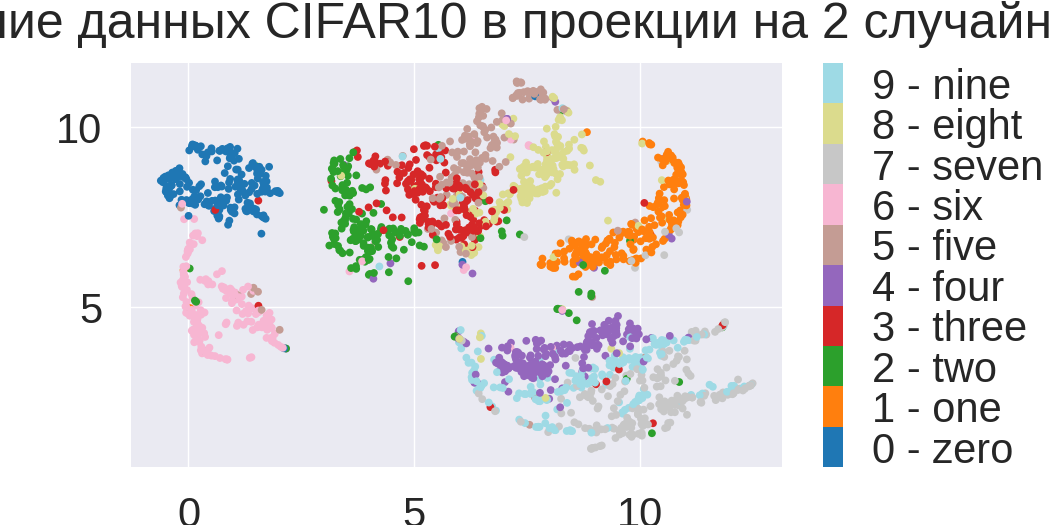

In [ ]:
# Если картинка окажется слишком маленькой/большой, то поменяйте image_scale на подходящее значение
plot_interactive(
    lowd_mnist_data_train, mnist_images_train, mnist_labels_train,
    mnist_test_dataset.classes, n_dots=2000, image_scale=0.35
)

Эта картинка на случай если не сохранится интерактивный график



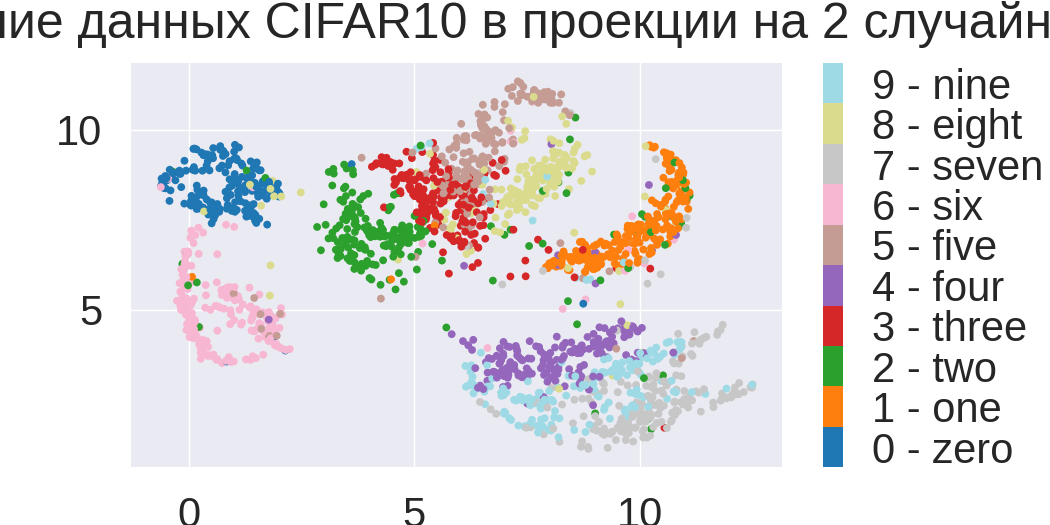

In [ ]:
plot_interactive(
    lowd_mnist_data_test, mnist_images_test, mnist_labels_test,
    mnist_test_dataset.classes, n_dots=2000, image_scale=0.35
)

Вернёмся в статичный режим отрисовки изображений:

In [ ]:
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='orange'>**Задание 1.4 [код]**</font>

Разбейте выборку следующим образом:
1. Разбейте случайным образом обучающую выборку на 2 части — размеченную и неразмеченную. Считайте, что доля размеченных объектов — `fraction_of_labeled`. Метки неразмеченной части замените на $-1$.
2. Тестовую выборку разбейте в соотношении $30$ на $70$ — меньшую часть (далее будет называться **валидационной выборкой**) используйте для подбора гиперпараметров, а большую (**тестовая выборка**) для итоговой оценки качества.

In [ ]:
fraction_of_labeled = 0.01

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

X_train_unlabeled, X_train_labeled, y_train_unlabeled, y_train_labeled = train_test_split(mnist_data_train,
                                                                                          mnist_labels_train,
                                                                                          test_size=fraction_of_labeled,
                                                                                          random_state=42)
y_train_unlabeled[:] = -1

X_train, y_train = np.concatenate([X_train_unlabeled, X_train_labeled]), np.concatenate([y_train_unlabeled, y_train_labeled])

X_valid, X_test, y_valid, y_test = train_test_split(mnist_data_test, mnist_labels_test, test_size=0.7, random_state=42)

#### <font color='orange'>**Задание 1.5 [кросспроверка, 9 баллов][код]**</font>

Используя MetaSemiSupervisedModel подберите оптимальные параметры:

* `C` — не менее $15$ точек в диапазоне $5-6$ десятичных порядков
* `n_clusters` — не менее $10$ точек вплоть до $100$
* `n_components` — не менее $7$ точек вплоть до $100$

для следующих моделей:
1. Исходные признаки + `LogisticRegression`
2. Исходные признаки + `SelfTrainingClassifier`
3. Исходные признаки + `KMeansClassifier`
4. `UMAP` + `LogisticRegression`
5. `UMAP` + `SelfTrainingClassifier`
6. `UMAP` + `KMeansClassifier`

Подбор каждого гиперпараметра должен быть сопровождён графиками точности на тестовой и валидационной выборках. Изобразите обе линии на одном графике.

При переборе **обязательно выводите значение найденного оптимального параметра и качество модели с оптимальным гиперпараметром** на выборке для итоговой оценки качества.

В последних трёх моделях используйте гиперпараметры базовых моделей, найденные в первых трёх моделях.

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/
from sklearn.metrics import accuracy_score

## Определим сетки перебора параметров для каждой модели
param_grid = {'LogisticRegression'    : {'C'         : np.logspace(-6, 2, 15)},
              'SelfTrainingClassifier': {'C'         : np.logspace(-6, 2, 15)},
              'KMeansClassifier'      : {'n_clusters': np.linspace(1, 100, 11, dtype=int)},
              'UmapLogisticRegression'    : {'n_components': np.linspace(2, 100, 11, dtype=int)},
              'UmapSelfTrainingClassifier': {'n_components': np.linspace(2, 200, 11, dtype=int)},
              'UmapKMeansClassifier'      : {'n_components': np.linspace(2, 200, 11, dtype=int)}}

In [ ]:
## Сюда положим результаты прогонов
results = {'LogisticRegression'    : {'valid': [], 'test': []},
           'SelfTrainingClassifier': {'valid': [], 'test': []},
           'KMeansClassifier'      : {'valid': [], 'test': []},
           'UmapLogisticRegression'    : {'valid': [], 'test': []},
           'UmapSelfTrainingClassifier': {'valid': [], 'test': []},
           'UmapKMeansClassifier'      : {'valid': [], 'test': []}}

In [ ]:
## Здесь будут оптимальные параметры
optimal_params = {'LogisticRegression'    : {},
                  'SelfTrainingClassifier': {},
                  'KMeansClassifier'      : {},
                  'UmapLogisticRegression'    : {'metric': 'precomputed'},
                  'UmapSelfTrainingClassifier': {'metric': 'precomputed'},
                  'UmapKMeansClassifier'      : {'metric': 'precomputed'}}

In [ ]:
## Перебор для первых 3-ех моделей
for model_name in ['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']:
    param_range = param_grid[model_name]
    param_name = list(param_range)[0]
    for param_val in param_range[param_name]:
        model = MetaSemiSupervisedModel(model=model_name,
                                        model_kwargs={param_name: param_val}
                                       ).fit(X_train, y_train)

        results[model_name]['valid'].append(accuracy_score(y_valid, model.predict(X_valid)))
        results[model_name]['test'].append(accuracy_score(y_test, model.predict(X_test)))

In [ ]:
%config InlineBackend.figure_format = 'svg'

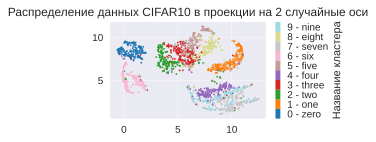

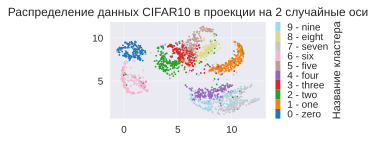

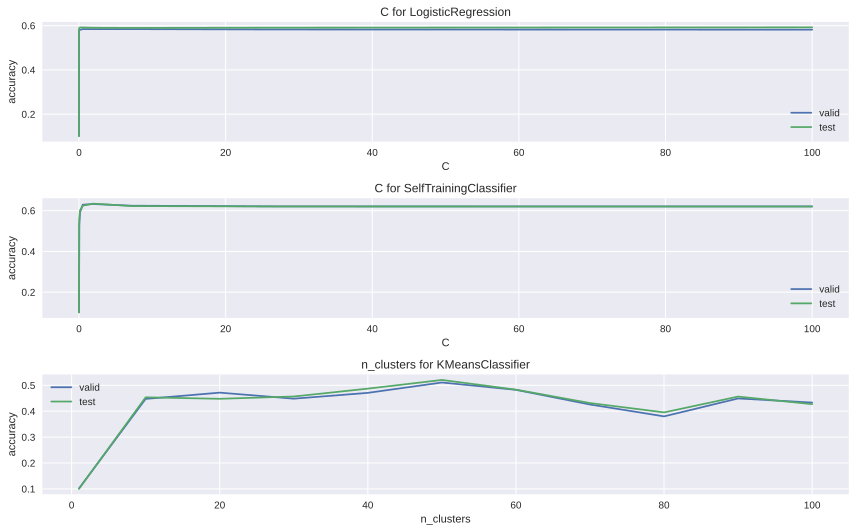

In [ ]:
fig, ax = plt.subplots(3)
fig.set_size_inches(12, 7.5)
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid[model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]
    ax[i].set_title(f'{param_name} for {model}')
    ax[i].plot(param_range, results[model]['valid'], label='valid')
    ax[i].plot(param_range, results[model]['test'], label='test')
    ax[i].set_ylabel('accuracy')
    ax[i].set_xlabel(param_name)
    ax[i].legend()
plt.tight_layout()
plt.show()

In [ ]:
## Найденные оптмальные гиперпараметры (найдем по валидационной выборке и оценим на тесте)
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid[model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]

    best_model_idx = np.argmax(results[model]['valid'])
    optimal_params[model][param_name] = param_range[best_model_idx]
    acc_on_test = results[model]['test'][best_model_idx]

    print(f"Optimal {param_name} for {model}: {optimal_params[model][param_name]}")
    print(f"Test accurcay for optimal param: {acc_on_test}\n")

Optimal C for LogisticRegression: 0.5179474679231202
Test accurcay for optimal param: 0.5917857142857142

Optimal C for SelfTrainingClassifier: 1.9306977288832496
Test accurcay for optimal param: 0.6342857142857142

Optimal n_clusters for KMeansClassifier: 50
Test accurcay for optimal param: 0.5207142857142857



In [ ]:
## Отдельно нормализуем данные и посчитаем попарные расстояния
from sklearn.metrics import pairwise_distances
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

X_train_dist = pairwise_distances(X_train_scaled)
X_valid_dist = pairwise_distances(X_valid_scaled, X_train_scaled)
X_test_dist = pairwise_distances(X_test_scaled, X_train_scaled)

In [ ]:
## Перебор для последних 3-ех моделей
for model_name in ['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']:
    param_range = param_grid['Umap' + model_name]
    param_name = list(param_range)[0]
    for param_val in param_range[param_name]:
        model = MetaSemiSupervisedModel(data_processing='UMAP',
                                        model=model_name,
                                        model_kwargs=optimal_params[model_name],  # теперь обучаем с оптимальными параметрами
                                        reducer_kwargs={param_name: param_val, 'metric': 'precomputed'}
                                       ).fit(X_train_dist, y_train)

        results['Umap' + model_name]['valid'].append(accuracy_score(y_valid, model.predict(X_valid_dist)))
        results['Umap' + model_name]['test'].append(accuracy_score(y_test, model.predict(X_test_dist)))

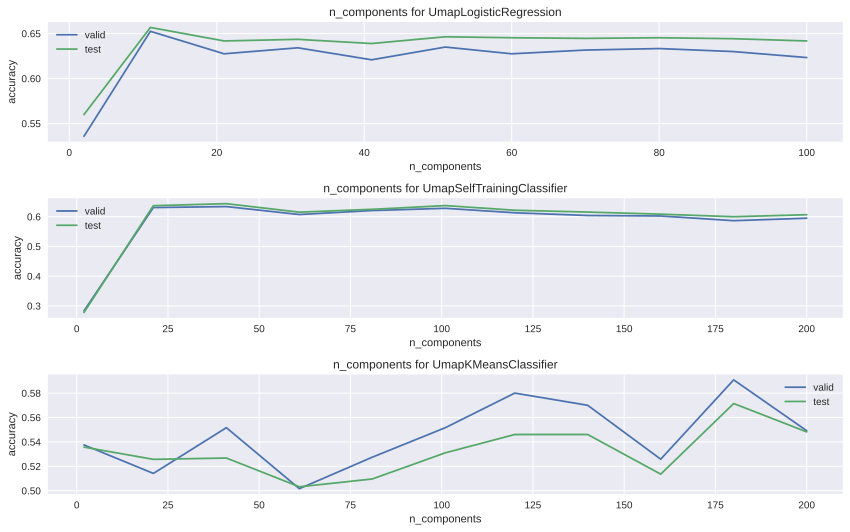

In [ ]:
fig, ax = plt.subplots(3)
fig.set_size_inches(12, 7.5)
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid['Umap' + model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]
    ax[i].set_title(f'{param_name} for {"Umap" + model}')
    ax[i].plot(param_range, results['Umap' + model]['valid'], label='valid')
    ax[i].plot(param_range, results['Umap' + model]['test'], label='test')
    ax[i].set_ylabel('accuracy')
    ax[i].set_xlabel(param_name)
    ax[i].legend()
plt.tight_layout()
plt.show()

In [ ]:
## Найденные оптмальные гиперпараметры (найдем по валидационной выборке и оценим на тесте)
for i, model in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    param_range = param_grid['Umap' + model]
    param_name = list(param_range)[0]
    param_range = param_range[param_name]

    best_model_idx = np.argmax(results['Umap' + model]['valid'])
    optimal_params['Umap' + model][param_name] = param_range[best_model_idx]
    acc_on_test = results['Umap' + model]['test'][best_model_idx]

    print(f"Optimal {param_name} for {model}: {optimal_params['Umap' + model][param_name]}")
    print(f"Test accurcay for optimal param: {acc_on_test}\n")

Optimal n_components for LogisticRegression: 11
Test accurcay for optimal param: 0.6567857142857143

Optimal n_components for SelfTrainingClassifier: 41
Test accurcay for optimal param: 0.6439285714285714

Optimal n_components for KMeansClassifier: 180
Test accurcay for optimal param: 0.5714285714285714



In [ ]:
optimal_params

{'LogisticRegression': {'C': 0.5179474679231202},
 'SelfTrainingClassifier': {'C': 1.9306977288832496},
 'KMeansClassifier': {'n_clusters': 50},
 'UmapLogisticRegression': {'metric': 'precomputed', 'n_components': 11},
 'UmapSelfTrainingClassifier': {'metric': 'precomputed', 'n_components': 41},
 'UmapKMeansClassifier': {'metric': 'precomputed', 'n_components': 180}}

#### <font color='orange'>**Задание 1.6 [кросспроверка, 9 баллов][вопрос]**</font>

Опишите полученные результаты. Какая модель проявила себя лучше всего? Как влияет на результат снижение размерности признакового пространства?

<font color='magenta'>*Ваш ответ здесь:*</font> (ｏ・_・)ノ”(ノ_<、)

1. Сложно сказать, какя модель покалазала себя лучше всего. По итоговому качеству на тесте впереди оказалась модель Umap + LogistciRegression. При этом ее резульататы очень близки к Umap + KMeansClassifier и к SelfTrainingClassifier без UMAP. Так что можно сказать, что эти три модели примерно одинково хороши, особенно учитывая случайность. Но, даже с преподсчитанными матрицами попарных расстояний и с n_neighbours=8, обучение с UMAP занимает значительно больше времени.

2. Снижение размерности позволило улучшить качество для всех моделей.

#### <font color='orange'>**Задание 1.7 [кросспроверка, 6 баллов][код]**</font>

Обучите каждую из шести моделей на выборках с разной долей размеченных объектов. Используйте оптимальные параметры из предыдущего пункта. Изобразите итоговое качество в зависимости от доли размеченных объектов для всех моделей на одном графике.

Используйте сетку для перебора, указанную ниже. При желании можете взять больше точек.

In [ ]:
fraction_of_labeled_range = [0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 0.7, 0.99]

In [ ]:
# Ваш код здесь:＼(º □ º l|l)/

end_res = {'LogisticRegression': [], 'SelfTrainingClassifier': [], 'KMeansClassifier': [],
           'UmapLogisticRegression': [], 'UmapSelfTrainingClassifier': [], 'UmapKMeansClassifier': []}

for fraction_of_labeled in fraction_of_labeled_range:
    X_train_unlabeled, X_train_labeled, y_train_unlabeled, y_train_labeled = train_test_split(mnist_data_train,
                                                                                              mnist_labels_train,
                                                                                              test_size=fraction_of_labeled,
                                                                                              random_state=42)
    y_train_unlabeled[:] = -1
    X_train, y_train = np.concatenate([X_train_unlabeled, X_train_labeled]), np.concatenate([y_train_unlabeled, y_train_labeled])

    scaler = StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    X_train_dist = pairwise_distances(X_train_scaled)
    X_test_dist = pairwise_distances(X_test_scaled, X_train_scaled)

    for model_name in ['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']:

        model = MetaSemiSupervisedModel(model=model_name,
                                        model_kwargs=optimal_params[model_name]
                                       ).fit(X_train, y_train)

        umap_model = MetaSemiSupervisedModel(model=model_name,
                                             data_processing='UMAP',
                                             model_kwargs=optimal_params[model_name],
                                             reducer_kwargs=optimal_params['Umap' + model_name]
                                            ).fit(X_train_dist, y_train)

        end_res[model_name].append(accuracy_score(y_test, model.predict(X_test)))
        end_res['Umap' + model_name].append(accuracy_score(y_test, umap_model.predict(X_test_dist)))


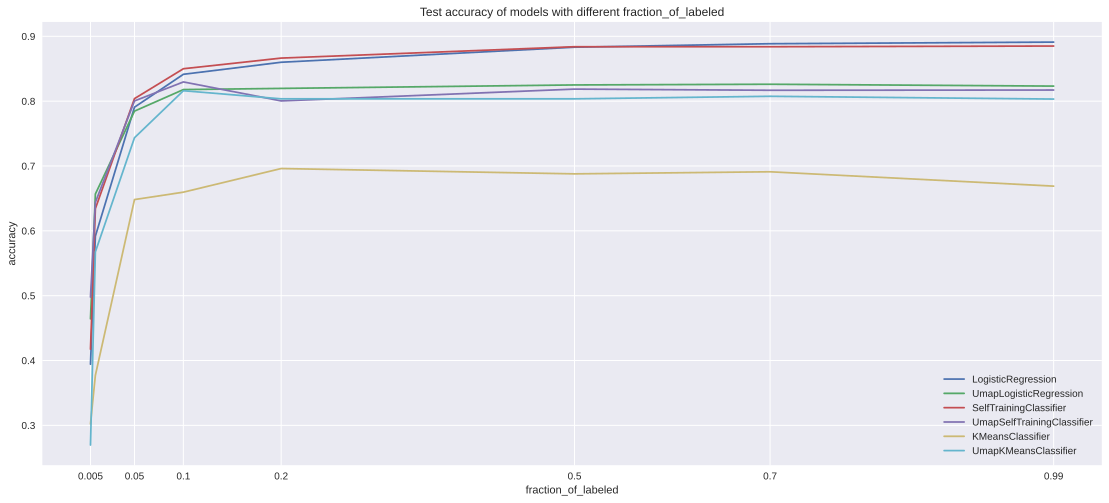

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(19, 8)

ax.set_title('Test accuracy of models with different fraction_of_labeled')
for i, model_name in enumerate(['LogisticRegression', 'SelfTrainingClassifier', 'KMeansClassifier']):
    ax.plot(fraction_of_labeled_range, end_res[model_name], label=model_name)
    ax.plot(fraction_of_labeled_range, end_res['Umap' + model_name], label='Umap' + model_name)

ax.legend()
fraction_of_labeled_range.remove(0.01)
ax.set_xticks(fraction_of_labeled_range, fraction_of_labeled_range)
ax.set_xlabel('fraction_of_labeled')
ax.set_ylabel('accuracy')
plt.show()

#### <font color='orange'>**Задание 1.8 [кросспроверка, 6 баллов][вопрос]**</font>

Как разные модели ведут себя в зависимости от объёма размеченных данных? Какой размер выборки достаточно разметить, чтобы получить близкое к максимальному качество? В каких случаях может быть выгодно использовать методы снижения размерности?

<font color='magenta'>*Ваш ответ здесь:*</font> (ｏ・_・)ノ”(ノ_<、)

Как разные модели ведут себя в зависимости от объёма размеченных данных:
      
1. Качество LogisticRegression с ростом объема размеченных данных монотонно растет. Это неудивительно, тк эта модель обучается *только* на размеченных данных - чем их больше, тем лучше.    

2. Качество UmapLogisticRegression сначала растет почти также, как LogisticRegression, но начиная с доли в 0.2 расти перестает. Скорее всего это связано с тем, что UMAP не лучшим образом выделяет признаки из изображений и с ростом числа объектов теряется слишком много полезной информации.    

3. SelfTrainingClassifier ведет себя также, как LogisticRegression, но за счет использования неразмеченной части выборки сначала растет быстрее. Когда доля размеченной выборки становится близка к 1, то модель начинает совпадать с LogisticRegression. Это неудивительно, тк базовой моделью для SelfTrainingClassifier как раз и является LogisticRegression. Когда почти вся выборка размечена, то выигрыша в Label Propagation практически нет, хотя и хуже не становится.    

4. UmapSelfTrainingClassifier ведет себя один в один как просто SelfTrainingClassifier, но перестает расти с доли в 0.2. Интересно, что UmapSelfTrainingClassifier при стремлении доли размеченных данных к 1, начинает совпадать с UmapLogisticRegression. Также как просто SelfTrainingClassifier и просто LogisticRegression    

5. KMeansClaffifier при совсем неболльшой доле размеченных данных близок к остальным моделям, но в основном проигрывает. То растет, то падает и лучшего качество досстигает при использовании 0.7 от всех меток, а не при 0.99. Это связано с тем, что в исходном признаковом пространстве (т.е. в пикселях), очень сложно кластеризовать объекты, особенно в предположении выпкулых округлых кластеров.    

6. UmapKMeansClaffifier гораздо лучше, чем без Umap. Опять же в начале наблюадется быстрый рост, на равне с другими моделями, но начиная с доли в 0.2 расти перестает. Скорее всего это связано с тем, что UMAP не лучшим образом выделяет признаки из изображений и с ростом числа объектов теряется слишком много полезной информации + сложная форма кластеров.

Какой размер выборки достаточно разметить, чтобы получить близкое к максимальному качество: [0.1 - 0.5] - До этого числа качество всех моделей растет.

Модели с UMAP выгодно использовать при небольшой доле размеченных данных.

----------------------------------------------
<font color="white" style="opacity:0.2023"></font>

#### <font color='orange'>**Задание 1.9 [бонус, 3 балла]**</font>

Вставьте картинку/музыку/текст и пр., описывающее ваше ощущение от погружения в ML :)

[Обязательно надо послушать эту песню](https://youtu.be/dQw4w9WgXcQ?si=WOf3TNHAD6xiI1dO)

Надеюсь после этой песни ты подбавишь мне баллов в заданиях где я плохо справился 😉 🙈

[Ну и после этой тоже](https://youtu.be/yPYZpwSpKmA?si=G5reL0pPQMrhAKtY)

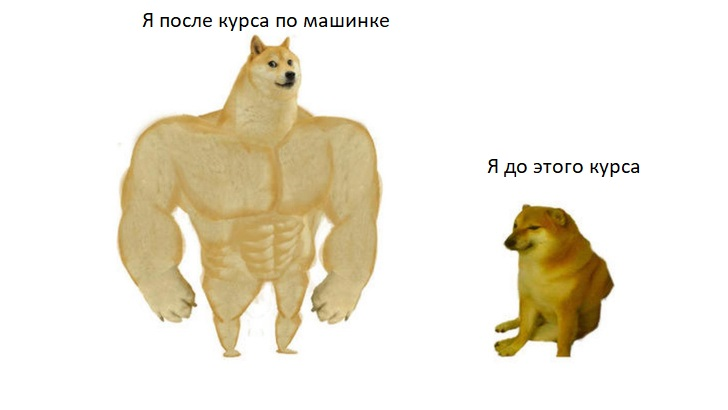

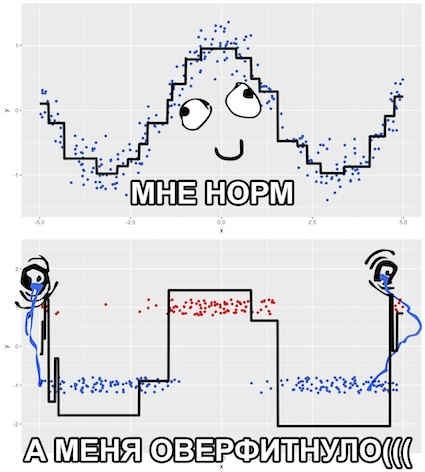